We'll implement two classification algorithms which are using all the previous material: probabilities, gradient descent, etc.: 

Logistic regression                                                                                                     
https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F                                                                                  
https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html                                                     
Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y1 = np.array([np.random.rand(1) + 2 for c in (range(np.random.choice([c+60 for c in range(40)])))])
y2 = np.array([np.random.rand(1) + 2.4 for c in (range(np.random.choice([c+60 for c in range(40)])))])

x1 = np.array(range(len(y1)))
x2 = np.array([c+50 for c in range(len(y2))])

In [3]:
# data matrix 
a1 = np.concatenate((x1.reshape(-1,1),y1,np.array([1 for c in range(len(x1))]).reshape(-1,1)), 1)
a2 = np.concatenate((x2.reshape(-1,1),y2,np.array([0 for c in range(len(x2))]).reshape(-1,1)), 1)

A = np.concatenate((a1,a2), 0).round(1)

In [4]:
A.shape, y1.shape[0], y2.shape[0]

((194, 3), 98, 96)

In [5]:
A

array([[  0. ,   2.3,   1. ],
       [  1. ,   2.4,   1. ],
       [  2. ,   2.1,   1. ],
       [  3. ,   2.7,   1. ],
       [  4. ,   2.7,   1. ],
       [  5. ,   2.4,   1. ],
       [  6. ,   2.9,   1. ],
       [  7. ,   2. ,   1. ],
       [  8. ,   2.5,   1. ],
       [  9. ,   2.1,   1. ],
       [ 10. ,   3. ,   1. ],
       [ 11. ,   2.4,   1. ],
       [ 12. ,   2.4,   1. ],
       [ 13. ,   2. ,   1. ],
       [ 14. ,   2.5,   1. ],
       [ 15. ,   2. ,   1. ],
       [ 16. ,   2.3,   1. ],
       [ 17. ,   2.2,   1. ],
       [ 18. ,   2.4,   1. ],
       [ 19. ,   2. ,   1. ],
       [ 20. ,   2.7,   1. ],
       [ 21. ,   2.6,   1. ],
       [ 22. ,   3. ,   1. ],
       [ 23. ,   2.2,   1. ],
       [ 24. ,   2.4,   1. ],
       [ 25. ,   2. ,   1. ],
       [ 26. ,   2.5,   1. ],
       [ 27. ,   2.3,   1. ],
       [ 28. ,   2.1,   1. ],
       [ 29. ,   2.8,   1. ],
       [ 30. ,   2.4,   1. ],
       [ 31. ,   2.2,   1. ],
       [ 32. ,   2. ,   1. ],
       [ 3

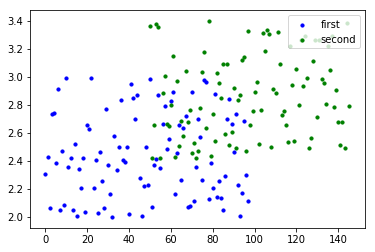

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=10, c='b', marker="o", label='first')
ax1.scatter(x2, y2, s=10, c='g', marker="o", label='second')
plt.legend(loc='upper right');
plt.show()

In [7]:
np.hstack((A, np.ones((A.shape[0], 1), dtype=A.dtype)))

array([[  0. ,   2.3,   1. ,   1. ],
       [  1. ,   2.4,   1. ,   1. ],
       [  2. ,   2.1,   1. ,   1. ],
       [  3. ,   2.7,   1. ,   1. ],
       [  4. ,   2.7,   1. ,   1. ],
       [  5. ,   2.4,   1. ,   1. ],
       [  6. ,   2.9,   1. ,   1. ],
       [  7. ,   2. ,   1. ,   1. ],
       [  8. ,   2.5,   1. ,   1. ],
       [  9. ,   2.1,   1. ,   1. ],
       [ 10. ,   3. ,   1. ,   1. ],
       [ 11. ,   2.4,   1. ,   1. ],
       [ 12. ,   2.4,   1. ,   1. ],
       [ 13. ,   2. ,   1. ,   1. ],
       [ 14. ,   2.5,   1. ,   1. ],
       [ 15. ,   2. ,   1. ,   1. ],
       [ 16. ,   2.3,   1. ,   1. ],
       [ 17. ,   2.2,   1. ,   1. ],
       [ 18. ,   2.4,   1. ,   1. ],
       [ 19. ,   2. ,   1. ,   1. ],
       [ 20. ,   2.7,   1. ,   1. ],
       [ 21. ,   2.6,   1. ,   1. ],
       [ 22. ,   3. ,   1. ,   1. ],
       [ 23. ,   2.2,   1. ,   1. ],
       [ 24. ,   2.4,   1. ,   1. ],
       [ 25. ,   2. ,   1. ,   1. ],
       [ 26. ,   2.5,   1. ,   1. ],
 

In [8]:
temp = np.ones((A.shape[0], A.shape[1]+1))
temp[:,1:] = A
X = temp[:,:-1]
y = temp[:,-1]

In [9]:
X

array([[  1. ,   0. ,   2.3],
       [  1. ,   1. ,   2.4],
       [  1. ,   2. ,   2.1],
       [  1. ,   3. ,   2.7],
       [  1. ,   4. ,   2.7],
       [  1. ,   5. ,   2.4],
       [  1. ,   6. ,   2.9],
       [  1. ,   7. ,   2. ],
       [  1. ,   8. ,   2.5],
       [  1. ,   9. ,   2.1],
       [  1. ,  10. ,   3. ],
       [  1. ,  11. ,   2.4],
       [  1. ,  12. ,   2.4],
       [  1. ,  13. ,   2. ],
       [  1. ,  14. ,   2.5],
       [  1. ,  15. ,   2. ],
       [  1. ,  16. ,   2.3],
       [  1. ,  17. ,   2.2],
       [  1. ,  18. ,   2.4],
       [  1. ,  19. ,   2. ],
       [  1. ,  20. ,   2.7],
       [  1. ,  21. ,   2.6],
       [  1. ,  22. ,   3. ],
       [  1. ,  23. ,   2.2],
       [  1. ,  24. ,   2.4],
       [  1. ,  25. ,   2. ],
       [  1. ,  26. ,   2.5],
       [  1. ,  27. ,   2.3],
       [  1. ,  28. ,   2.1],
       [  1. ,  29. ,   2.8],
       [  1. ,  30. ,   2.4],
       [  1. ,  31. ,   2.2],
       [  1. ,  32. ,   2. ],
       [  

In [10]:
def sigm(x):
    return 1/(np.exp(-x)+1)

In [11]:
def accuracy_score(y, y_pred):
    return (y == y_pred).astype(int).sum()/y.shape[0]

In [52]:
def train(X_, y_, batch_size, epochs, eta):
    theta = np.random.rand(X.shape[1])
    
    for i in range(epochs):
        print('accuracy: ', accuracy_score(y_, sigm(theta.T@ X_.T).squeeze()>0.5))
        rand_idxs = np.random.randint(X.shape[0], size=batch_size)
        X_Batch = X_[rand_idxs]
        Y_batch = y_[rand_idxs]
        grad = 0
        batch_loss = 0
        for xx, yy in zip(X_Batch, Y_batch):
            grad += xx*(sigm(theta.T@xx)-yy)
            batch_loss += (1-yy)*np.log(1-sigm(theta.T@xx) + 1e-6) + yy*np.log(sigm(theta.T@xx)+ 1e-6)
        print('batch loss: ', -batch_loss)
        theta = theta - (1/X_Batch.shape[0])*eta*grad
    
    return theta
        

In [53]:
theta = train(X, y, 64, 1000, 0.001)

accuracy:  0.5051546391752577
batch loss:  428.3291242182837
accuracy:  0.5051546391752577
batch loss:  414.4965587831988
accuracy:  0.5051546391752577
batch loss:  497.44013368222926
accuracy:  0.5051546391752577
batch loss:  497.4283899328323
accuracy:  0.5051546391752577
batch loss:  414.5025760796793
accuracy:  0.5051546391752577
batch loss:  373.24929704112304
accuracy:  0.5051546391752577
batch loss:  372.83298315153763
accuracy:  0.5051546391752577
batch loss:  452.02295368613466
accuracy:  0.5051546391752577
batch loss:  351.7497862308041
accuracy:  0.5051546391752577
batch loss:  319.26536124382113
accuracy:  0.5051546391752577
batch loss:  335.8494911004045
accuracy:  0.5051546391752577
batch loss:  152.63028252941936
accuracy:  0.5773195876288659
batch loss:  46.38437286719768
accuracy:  0.7268041237113402
batch loss:  32.245217617624405
accuracy:  0.7371134020618557
batch loss:  36.668088908109404
accuracy:  0.7216494845360825
batch loss:  34.058453067027344
accuracy:  0.73

accuracy:  0.7371134020618557
batch loss:  30.8031206335207
accuracy:  0.7319587628865979
batch loss:  30.230471164829495
accuracy:  0.7422680412371134
batch loss:  32.58892722101826
accuracy:  0.7422680412371134
batch loss:  27.96146318794576
accuracy:  0.7268041237113402
batch loss:  32.933160688413565
accuracy:  0.7268041237113402
batch loss:  35.174603358367726
accuracy:  0.7268041237113402
batch loss:  34.8086300167399
accuracy:  0.7319587628865979
batch loss:  22.95956314189852
accuracy:  0.7371134020618557
batch loss:  26.559007729700213
accuracy:  0.7371134020618557
batch loss:  36.61664127970845
accuracy:  0.7371134020618557
batch loss:  32.15962338471855
accuracy:  0.7371134020618557
batch loss:  24.14084611019515
accuracy:  0.7371134020618557
batch loss:  23.99518221923981
accuracy:  0.7371134020618557
batch loss:  28.600587331479026
accuracy:  0.7371134020618557
batch loss:  28.348587775050134
accuracy:  0.7319587628865979
batch loss:  37.1845405319497
accuracy:  0.72680412

batch loss:  38.56248641551242
accuracy:  0.7319587628865979
batch loss:  33.21503742266086
accuracy:  0.6958762886597938
batch loss:  32.81984290415092
accuracy:  0.7422680412371134
batch loss:  29.014041817232137
accuracy:  0.7216494845360825
batch loss:  34.73544848652485
accuracy:  0.7010309278350515
batch loss:  32.16462072500961
accuracy:  0.7268041237113402
batch loss:  32.45393392360484
accuracy:  0.7371134020618557
batch loss:  31.2582898900169
accuracy:  0.7268041237113402
batch loss:  24.825782351479088
accuracy:  0.7422680412371134
batch loss:  37.61133285872662
accuracy:  0.711340206185567
batch loss:  35.80948781965547
accuracy:  0.7319587628865979
batch loss:  33.56180936692009
accuracy:  0.7422680412371134
batch loss:  32.741672948484215
accuracy:  0.7371134020618557
batch loss:  26.88334944319512
accuracy:  0.7319587628865979
batch loss:  30.897231840029512
accuracy:  0.7216494845360825
batch loss:  34.37588614411052
accuracy:  0.7371134020618557
batch loss:  34.304197

batch loss:  22.486779904625042
accuracy:  0.7268041237113402
batch loss:  42.97350290523539
accuracy:  0.7371134020618557
batch loss:  26.038012676463772
accuracy:  0.7422680412371134
batch loss:  36.271373334132434
accuracy:  0.7268041237113402
batch loss:  29.161180827014576
accuracy:  0.7371134020618557
batch loss:  33.2455121660541
accuracy:  0.7422680412371134
batch loss:  38.602652397626684
accuracy:  0.7216494845360825
batch loss:  31.760305016931426
accuracy:  0.7319587628865979
batch loss:  33.75023731849289
accuracy:  0.6958762886597938
batch loss:  37.88239507406949
accuracy:  0.7319587628865979
batch loss:  37.89873164372308
accuracy:  0.7216494845360825
batch loss:  34.81901035785143
accuracy:  0.7010309278350515
batch loss:  36.425893308835455
accuracy:  0.7422680412371134
batch loss:  22.087757620759675
accuracy:  0.711340206185567
batch loss:  26.631918341423216
accuracy:  0.7164948453608248
batch loss:  42.56486314926413
accuracy:  0.7216494845360825
batch loss:  35.3

accuracy:  0.7422680412371134
batch loss:  24.913720327578176
accuracy:  0.7319587628865979
batch loss:  36.63980615131902
accuracy:  0.7422680412371134
batch loss:  41.42398437939885
accuracy:  0.6958762886597938
batch loss:  30.40635221238655
accuracy:  0.7319587628865979
batch loss:  34.22858263566716
accuracy:  0.7371134020618557
batch loss:  28.833132414177733
accuracy:  0.7371134020618557
batch loss:  31.586876795512023
accuracy:  0.7422680412371134
batch loss:  34.87382473713933
accuracy:  0.7371134020618557
batch loss:  23.776785233802194
accuracy:  0.7422680412371134
batch loss:  30.114836411753828
accuracy:  0.7371134020618557
batch loss:  39.20308630392983
accuracy:  0.7319587628865979
batch loss:  34.06225244655669
accuracy:  0.7422680412371134
batch loss:  27.958430347063377
accuracy:  0.7268041237113402
batch loss:  29.160674158043587
accuracy:  0.7422680412371134
batch loss:  35.309066758551204
accuracy:  0.7371134020618557
batch loss:  33.533730874273786
accuracy:  0.73

accuracy:  0.7422680412371134
batch loss:  39.69984157738361
accuracy:  0.6958762886597938
batch loss:  33.82268131342022
accuracy:  0.7319587628865979
batch loss:  36.01032703899673
accuracy:  0.6907216494845361
batch loss:  32.32520461608677
accuracy:  0.7319587628865979
batch loss:  32.64186964614233
accuracy:  0.7422680412371134
batch loss:  32.507743561815246
accuracy:  0.7268041237113402
batch loss:  30.588864754894207
accuracy:  0.7268041237113402
batch loss:  39.494754583695446
accuracy:  0.7319587628865979
batch loss:  30.47684305082917
accuracy:  0.7371134020618557
batch loss:  27.70218431380312
accuracy:  0.7319587628865979
batch loss:  33.804852396969245
accuracy:  0.7268041237113402
batch loss:  37.06566853348643
accuracy:  0.7319587628865979
batch loss:  33.649952318206324
accuracy:  0.7216494845360825
batch loss:  33.66432649596506
accuracy:  0.7319587628865979
batch loss:  36.601879478777214
accuracy:  0.7422680412371134
batch loss:  35.02594908489862
accuracy:  0.73711

In [70]:
# test dataset

y1_test = np.array([np.random.rand(1) + 2 for c in (range(np.random.choice([c+60 for c in range(40)])))])
y2_test = np.array([np.random.rand(1) + 2.4 for c in (range(np.random.choice([c+60 for c in range(40)])))])

x1_test = np.array(range(len(y1_test)))
x2_test = np.array([c+50 for c in range(len(y2_test))])

a1_test = np.concatenate((x1_test.reshape(-1,1),y1_test,np.array([1 for c in range(len(x1_test))]).reshape(-1,1)), 1)
a2_test = np.concatenate((x2_test.reshape(-1,1),y2_test,np.array([0 for c in range(len(x2_test))]).reshape(-1,1)), 1)

A_test = np.concatenate((a1_test,a2_test), 0).round(1)
np.random.shuffle(A_test)

In [71]:
temp_test = np.ones((A_test.shape[0], A_test.shape[1]+1))
temp_test[:,1:] = A_test
X_test = temp_test[:,:-1]
y_test = temp_test[:,-1]

In [72]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.])

In [73]:
def pred_logistic_regr(theta, data):
    return (sigm(theta.T@ data.T).squeeze()>0.5).astype(int)

In [74]:
y_pred_test = pred_logistic_regr(theta, X_test)

In [75]:
y_pred_test

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1])

In [76]:
accuracy_score(y_test,y_pred_test)

0.7635135135135135